## import data

In [1]:
import pandas as pd
nyc_broutes = pd.read_csv("./dwn_data/nyc_bike-routes.csv")
nyc_1719 = pd.read_csv("./dwn_data/zip-d-1719.csv")
nyc_1921 = pd.read_csv("./dwn_data/zip-d-1921.csv")


In [2]:
ds_1719 = nyc_1719.filter(regex="(Deaths|Other causes)")
lim = ds_1719.columns.get_loc("Other causes")
ds_1719 = ds_1719.iloc[0:,:lim+1]
ds_1719["d_total"] = [row[1].sum() for row in ds_1719.iterrows()]
ds_1719.insert(0, "zip", nyc_1719["ZIP CODE"])
ds_1719["zip"] = ds_1719["zip"].astype("str")

remap_cols = ["zip",
              "d_sept",
              "d_hiv",
              "d_malig_cancer",
              "d_col_cancer",
              "d_panc_cancer",
              "d_lung_cancer",
              "d_br_cancer",
              "d_pros_cancer",
              "d_diabetes",
              "d_psycho",
              "d_alzh",
              "d_hd", 
              "d_renal",
              "d_cereb",
              "d_pnuem",
              "d_respir",
              "d_liv",
              "d_nephros",
              "d_acc",
              "d_sh",
              "d_hom",
              "d_oc",
              "d_total"
              ]

ds_1719.columns = remap_cols

In [3]:
ds_1719

,zip,d_sept,d_hiv,d_malig_cancer,d_col_cancer,d_panc_cancer,d_lung_cancer,d_br_cancer,d_pros_cancer,d_diabetes,...,d_cereb,d_pnuem,d_respir,d_liv,d_nephros,d_acc,d_sh,d_hom,d_oc,d_total
0,10001,NaN,NaN,104.0,12.0,11.0,21.0,11.0,5.0,12.0,...,11.0,11.0,19.0,NaN,NaN,8.0,6.0,NaN,90.0,444.0
1,10002,11.0,NaN,434.0,39.0,29.0,96.0,24.0,19.0,58.0,...,84.0,74.0,66.0,5.0,27.0,46.0,25.0,NaN,394.0,2174.0
2,10003,NaN,6.0,185.0,14.0,22.0,50.0,11.0,10.0,12.0,...,16.0,19.0,29.0,NaN,NaN,14.0,12.0,NaN,129.0,741.0
3,10004,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,11.0
4,10005,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,11691,8.0,6.0,283.0,29.0,29.0,60.0,27.0,17.0,81.0,...,52.0,54.0,74.0,14.0,9.0,22.0,15.0,8.0,244.0,1752.0
180,11692,11.0,6.0,89.0,7.0,5.0,13.0,15.0,8.0,28.0,...,12.0,27.0,28.0,6.0,NaN,NaN,NaN,NaN,80.0,555.0
181,11693,NaN,NaN,55.0,13.0,NaN,9.0,7.0,NaN,6.0,...,9.0,NaN,12.0,NaN,NaN,7.0,NaN,NaN,30.0,224.0
182,11694,NaN,5.0,121.0,12.0,NaN,24.0,8.0,9.0,18.0,...,11.0,20.0,38.0,8.0,7.0,10.0,NaN,NaN,103.0,646.0


## sample plot heart disease trends

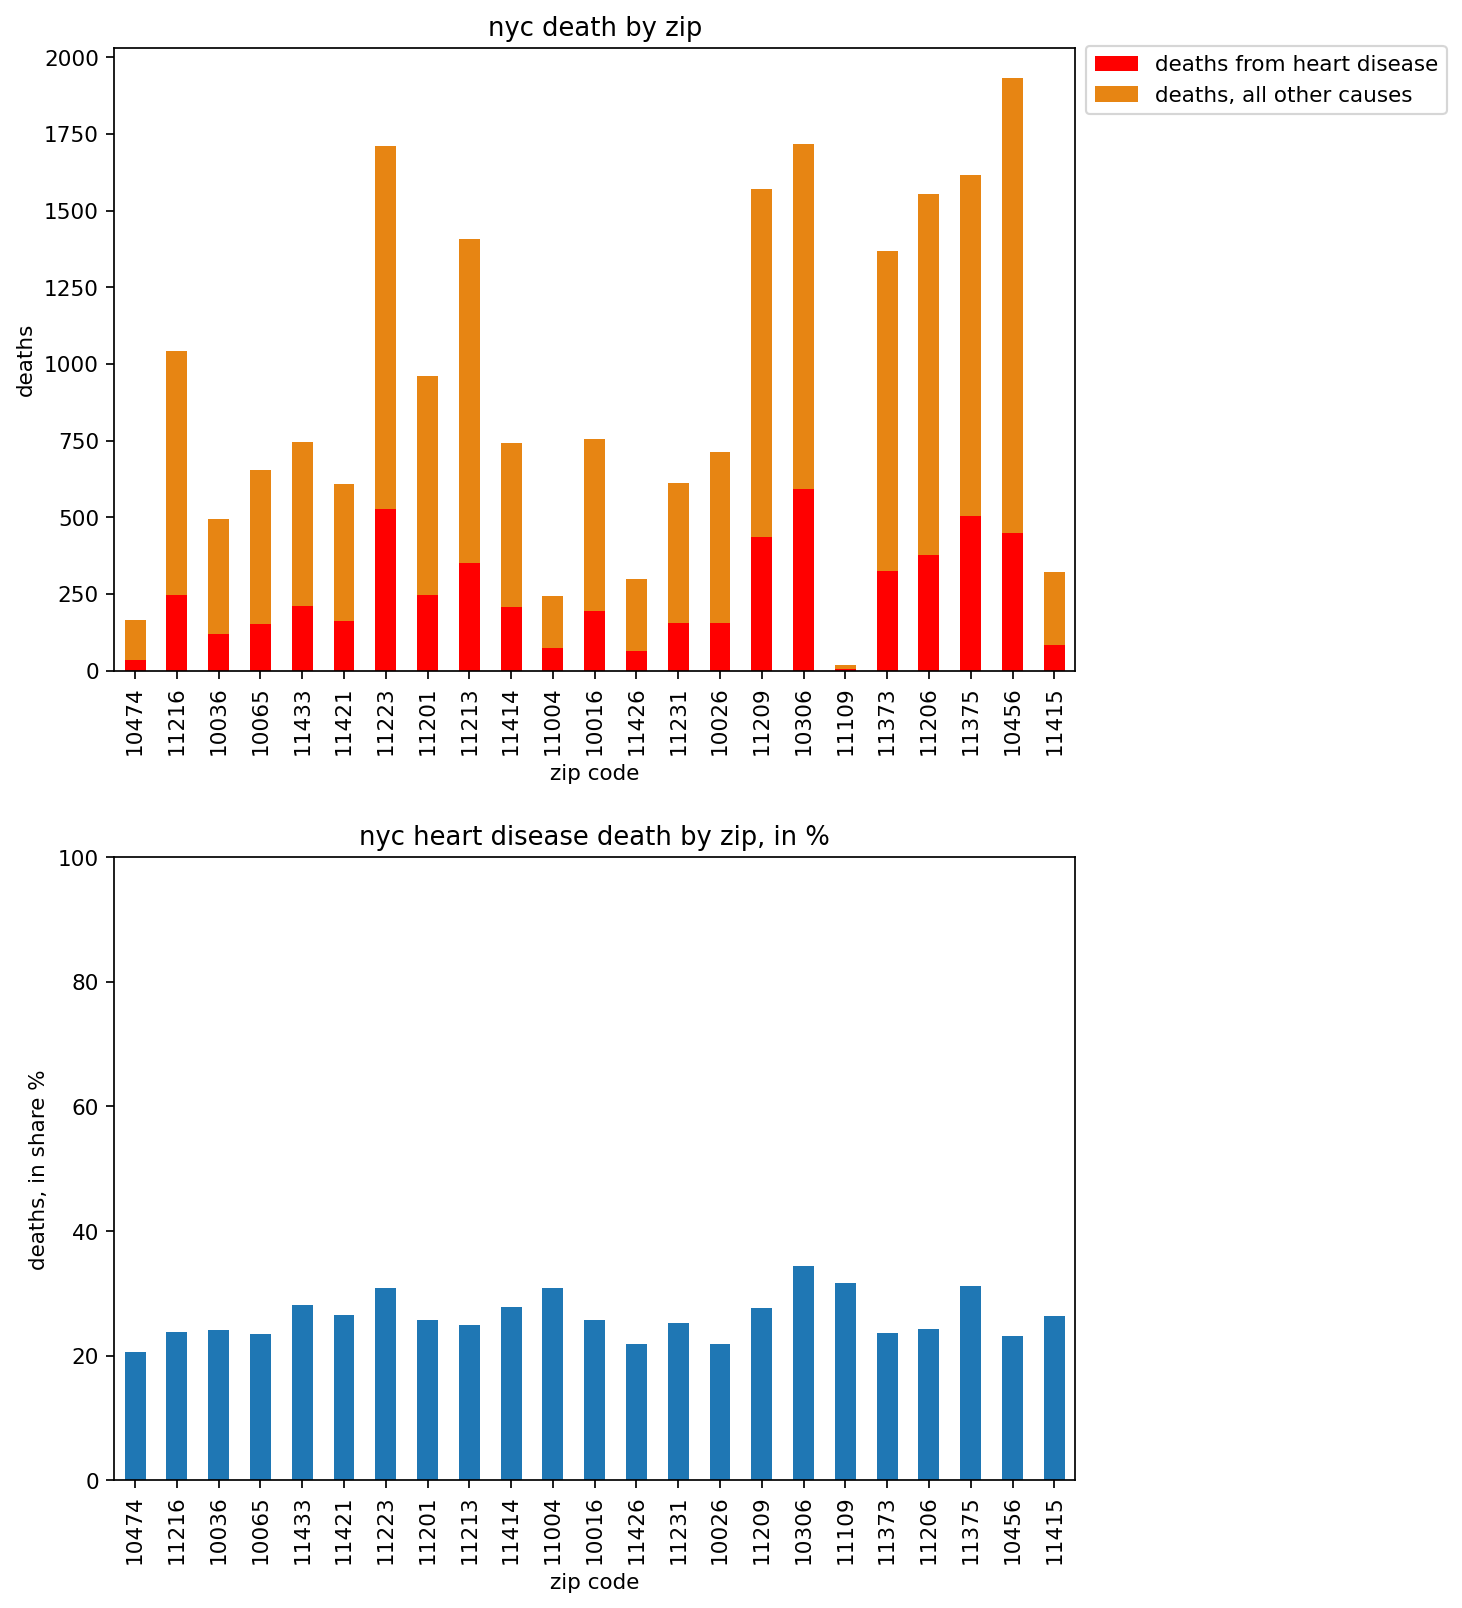

In [4]:
import matplotlib.pyplot as plt 

smpl_1719 = ds_1719.sample(n=23) # to grab 1/8 of data
dte = (smpl_1719["d_total"] - smpl_1719["d_hd"])
dp = ((smpl_1719["d_hd"] / smpl_1719["d_total"]) * 100)
smpl_1719.insert(smpl_1719.shape[1], "d_tot_ex_hd", dte)
smpl_1719.insert(smpl_1719.shape[1], "d_hd_p", dp)

f_width = 8
f_height = 12
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(f_width, f_height), dpi=155)

splot = smpl_1719.plot.bar(
    ax=axes[0],
    stacked=True,
    x="zip",
    y=["d_hd","d_tot_ex_hd"],
    xlabel="zip code",
    ylabel="deaths",
    title="nyc death by zip",
    label=["deaths from heart disease", "deaths, all other causes"],
    color=["red", "#e78513"]
    )
splot.legend(bbox_to_anchor=(1, 1.02))

splt_p = smpl_1719.plot.bar(
    ax=axes[1],
    x="zip",
    y="d_hd_p",
    xlabel="zip code",
    ylabel="deaths, in share %",
    ylim=[0,100],
    title="nyc heart disease death by zip, in %",
    legend=False,
)

plt.subplots_adjust(hspace=.3)
plt.show()

# ammend borough to each zip

In [5]:
geocodio_file = open("geocodio_key.txt", "r") 
geocodio_content = geocodio_file.read().split("\n")

gc_key = geocodio_content[0]

In [6]:
from geocodio import GeocodioClient, exceptions
client = GeocodioClient(gc_key)

In [7]:
bor_ids = ["err_r", "Manhattan", "Bronx", "Brooklyn", "Queens", "Staten Island"]
city_bor = {
            "New York": "Manhattan",
            "Staten Island": "Staten Island", 
            "Bronx": "Bronx",
            "Brooklyn": "Brooklyn"
           }

county_bor = {
              "Queens County": "Queens",
              "New York County": "Manhattan",
              "Bronx County" : "Bronx"
             }

def dec_borough(city, county): 
    
    borough = "err" 
    try: 
        borough = city_bor[city]
    except: 
        try: 
            borough = county_bor[county]
        except: 
            borough = "err_r"

    return borough

In [8]:
zip_by_borough = []

for row in ds_1719.iterrows(): 
    zip_c = row[1]["zip"]
    bor_loc = client.geocode(zip_c)
    z_city = bor_loc.get("results")[0]["address_components"]["city"]
    z_county = bor_loc.get("results")[0]["address_components"]["county"]

    bor = dec_borough(z_city, z_county)
    zip_by_borough.append(bor)


In [9]:
zbb_id = [bor_ids.index(i) for i in zip_by_borough]

## ammend bike route count to each zip

In [8]:
def num_to_ordinal(num): 
    """
        converts a numeric into its ordinal form 
    """
    try: 
        num = int(num) 
        if 11 <= (num % 100) <= 13: 
            ord = 'th'
        else: 
            ord = ['th', 'st', 'nd', 'rd', 'th'][min(num % 10, 4)]
        return (f"{num}{ord}")
    except: 
        return num


In [9]:

"""
    'street' or 'on_street' filtered for relevance: 

    'fromstreet' and 'tostreet" serve as endpoints,
    their zipcodes wouldn't necessairly contain the bikeroute searched
"""

broutes_sts = nyc_broutes[["boro", "street"]]

#### import past query data

In [39]:
strt_i = 0 

d_zips = ds_1719["zip"]
broutes_cnt = [0 for i in range(len(d_zips))]

zip_broutes = dict(zip(d_zips, broutes_cnt))

In [41]:
import json
try:
    import_query = json.load( open( "zip_queries.json" ) )
    strt_i = import_query["strt_i"] 
    zip_broutes = import_query["zc_br"]
except: 
    print("Excepted")


In [ ]:
strt_i, zip_broutes

In [43]:
query_broutes = broutes_sts.iloc[strt_i:]
query_broutes.head()

,boro,street
12529,5,CLOVE LAKES PARK PATH
12530,5,CLOVE LAKES PARK PATH
12531,5,CLOVE LAKES PARK PATH
12532,3,CROPSEY AV
12533,3,CROPSEY AV


In [44]:
mismatched_zips = [] 

Geocodio allows 2500 lookups for free daily, 

broute_sts has 21619 values to look up from. 

To do: 

* Over a 9 day period, run 2500 look ups per day
* pass safe the information into a dictionary
* record index of last queried cell
* next day: load in dictionary, load in index left on
* continue 2500 more queires

In [45]:
from IPython.display import clear_output

def display_progress(ind, tot, limiter): 
    if ind % limiter == 0: 
        bar = ["-" for spc in range(10)]
        fill = int(ind / tot * 10) 
        if fill > 0: 
            for f in range(fill): 
                bar[f] = "x"
        clear_output(wait=True)
        print("[" + "".join(bar) + "]")
    elif (ind) == tot: 
        print("[" + "".join(["x" for x in range(10)]) + "]")

In [46]:
from timeit import default_timer as timer

In [50]:
str_time = timer()
daily_queries = 300
lim = 10 # to prevent progress bar overload display

for i, row in enumerate(query_broutes.iterrows()): 
    if i == daily_queries:  ## to prevent geocodio query daily limit auth error 
        strt_i += i
        display_progress(i, daily_queries, lim)
        break
    
    rw = row[1]
    boro = bor_ids[rw["boro"]]
    st =rw["street"]
    st_formatted = " ".join([num_to_ordinal(wrd) for wrd in st.split(" ")])

    addr = f"{st_formatted}, {boro}, NY"

    try: 
        loc = client.geocode(addr)
        addr_zip = loc.formatted_address.split(" ")[-1]
        zip_broutes[addr_zip] += 1
    except exceptions.GeocodioDataError: 
        print(f"Geocodio Query Error on index: {i}, {addr}")
        pass 
    except KeyError: 
        mismatched_zips.append(addr_zip)
        pass

    if i % lim == 0: 
        display_progress(i, daily_queries, lim)
        
end_time = timer() 
print(f"Process executed in: {end_time - str_time} seconds and left off at index {strt_i}")

[xxxxxxxxxx]
Process executed in: 178.32760541699827 seconds and left off at index 12829


In [ ]:
# run after query
strt_i, zip_broutes

In [56]:
mismatched_zips

[]

In [57]:
sum(zip_broutes.values())

12788

In [54]:
import json

query_dump = {"strt_i": strt_i,
              "zc_br": zip_broutes
             } 
json.dump(query_dump, open( "zip_queries.json", 'w' ) )

# **DataFrame Building - by Borough**

In [15]:
deaths_by_borough_zip = {
    "zip": ds_1719["zip"],
    "boro": zip_by_borough,
    "boro_id": zbb_id,
    "d_hd": ds_1719["d_hd"],
    "d_tot": ds_1719["d_total"]
}

how_i_df = pd.DataFrame(data=deaths_by_borough_zip)
how_i_df = how_i_df.loc[how_i_df["boro_id"] != 0]
how_i_df.index = list(range(how_i_df.shape[0]))

```[!]``` ```how_i_df``` is our DataFrame which holds the following relevant info: 

* zip code 
* borough zip resides
* borough's id
* zip's report of heart disease-related death
* zip's report of total deaths

This DataFrame will be used to plot individual points in a scatter plot, coloring each point by their associated borough

In [16]:
how_i_df.sample(n=5)

,zip,boro,boro_id,d_hd,d_tot
114,11224,Brooklyn,3,727.0,1941.0
76,10469,Bronx,2,565.0,1904.0
78,10471,Bronx,2,406.0,961.0
49,10304,Staten Island,5,402.0,1230.0
25,10029,Manhattan,1,428.0,1949.0


In [17]:
bor_dhd = how_i_df.groupby("boro_id").apply(lambda x: x["d_hd"].sum(skipna=True), include_groups=False)
bor_dhd

boro_id
1     7428.0
2     7353.0
3    14580.0
4    12456.0
5     3890.0
dtype: float64

In [18]:
bor_dtot = how_i_df.groupby("boro_id").apply(lambda x: x["d_tot"].sum(skipna=True), include_groups=False)
bor_dtot

boro_id
1    31316.0
2    30622.0
3    51230.0
4    40903.0
5    12015.0
dtype: float64

In [19]:
broutes_by_borough = (nyc_broutes["boro"].value_counts())
broutes_by_borough

boro
3    5978
1    5714
4    5279
2    3490
5    1158
Name: count, dtype: int64

In [20]:
brl_by_borough_km = nyc_broutes.groupby("boro").apply(lambda x: x["Shape_Leng"].sum() / 3821, include_groups=False)
brl_by_borough_km 

boro
1    316.153523
2    202.187937
3    409.285340
4    347.320142
5    100.505226
dtype: float64

In [21]:
how_boro = pd.DataFrame(
    data={
          "boro": bor_ids[1:],
          "land_area (sq km)": [58.7, 109.2, 179.7, 281.6, 149.0],
          "bike_routes": broutes_by_borough, 
          "br_length_tot (km)": brl_by_borough_km, 
          "d_hd": bor_dhd,
          "d_tot": bor_dtot,
         }
    )
how_boro.insert(3, "br_per_sqkm", (how_boro["bike_routes"] / how_boro["land_area (sq km)"]))
how_boro.insert(5, "br_km_per_sqkm", (how_boro["br_length_tot (km)"] / how_boro["land_area (sq km)"]))
how_boro.insert(7, "d_hd, %", (how_boro["d_hd"] / how_boro["d_tot"]))
how_boro = how_boro.sort_values("boro")
how_boro.index = list(range(how_boro.shape[0]))
how_boro.to_csv("./prepped_data/how_boro_17-19.csv", index=False)
how_boro = how_boro.round(4)

In [22]:
how_boro

,boro,land_area (sq km),bike_routes,br_per_sqkm,br_length_tot (km),br_km_per_sqkm,d_hd,"d_hd, %",d_tot
0,Bronx,109.2,3490,31.9597,202.1879,1.8515,7353.0,0.2401,30622.0
1,Brooklyn,179.7,5978,33.2666,409.2853,2.2776,14580.0,0.2846,51230.0
2,Manhattan,58.7,5714,97.3424,316.1535,5.3859,7428.0,0.2372,31316.0
3,Queens,281.6,5279,18.7464,347.3201,1.2334,12456.0,0.3045,40903.0
4,Staten Island,149.0,1158,7.7718,100.5052,0.6745,3890.0,0.3238,12015.0


```[!]``` ```how_boro``` is our DataFrame which holds the following relevant info: 

* borough 
* borough's total count of bike routes
* borough's total length of bike routes (km)
* borough's total report of heart-disease related death
* borough's total report of death


### *Attribution of Faulty Data*

In [23]:
def mod(row, cols):
  rw = row[1]
  avg = 0 
  avg_dist = 0
  iters = 0 
  length = len(cols)
  for i in range(length):
      if not pd.isna(rw[cols[i]]):
          avg += rw[cols[i]]
          j = i + 1
          while j < length:  
              if not pd.isna(rw[cols[j]]):
                  avg_dist += abs(rw[cols[i]] - rw[cols[j]])
                  iters += 1
              j += 1
  margin_of_dif = pd.NA
  if (avg):
      avg = avg / length
      avg_dist = avg_dist / iters
      margin_of_dif = (avg_dist / avg) * 100
  return margin_of_dif

In [24]:
eds_1719 = nyc_1719.filter(regex="(Deaths|Other causes)")
emd_1719 = eds_1719.filter(regex="Male")
efd_1719 = eds_1719.filter(regex="Female")

mdt_cause = [row[1].sum() for row in emd_1719.iterrows()]
fdt_cause = [row[1].sum() for row in efd_1719.iterrows()]
dt_cause_sx = [(mdt_cause[i] + fdt_cause[i]) for i in range(len(mdt_cause))]

dt_sx = [(nyc_1719.loc[i, "Male"] + nyc_1719.loc[i, "Female"]) for i in range(nyc_1719.shape[0])]


In [25]:
dc_1719 = {"zip": nyc_1719["ZIP CODE"],
           "md, r": nyc_1719["Male"],
           "md, sb_c": mdt_cause,
           "fd, r": nyc_1719["Female"],
           "fd, sb_c": fdt_cause,
           "td, sb_gr": dt_sx,
           "td, sb_gc": dt_cause_sx,
           "td, sb_c": ds_1719["d_total"][:-1]
          }
dct_1719 = pd.DataFrame(dc_1719)

In [26]:
dct_1719.head()

,zip,"md, r","md, sb_c","fd, r","fd, sb_c","td, sb_gr","td, sb_gc","td, sb_c"
0,10001,206.0,204.0,194.0,216.0,400.0,420.0,444.0
1,10002,948.0,1048.0,1025.0,1121.0,1973.0,2169.0,2174.0
2,10003,314.0,352.0,328.0,375.0,642.0,727.0,741.0
3,10004,11.0,0.0,9.0,0.0,20.0,0.0,11.0
4,10005,18.0,6.0,NaN,0.0,NaN,6.0,7.0


In [27]:
dct_1719.insert(3, "md, dif in %", [mod(row, ["md, r", "md, sb_c"]) for row in dct_1719.iterrows()])
dct_1719.insert(6, "fd, dif in %", [mod(row, ["fd, r", "fd, sb_c"]) for row in dct_1719.iterrows()])
dct_1719.insert(10, "td, dif in %", [mod(row, ["td, sb_gr", "td, sb_gc", "td, sb_c"]) for row in dct_1719.iterrows()])

dct_1719["md, dif in %"] = pd.to_numeric(dct_1719["md, dif in %"], errors='coerce')
dct_1719["fd, dif in %"] = pd.to_numeric(dct_1719["fd, dif in %"], errors='coerce')
dct_1719["td, dif in %"] = pd.to_numeric(dct_1719["td, dif in %"], errors='coerce')

In [28]:
dct_1719.loc["avg"] = dct_1719.mean()
dct_1719.loc["avg", "zip"] = pd.NA
dct_1719 = dct_1719.round(2)

In [29]:
dct_1719.head()

,zip,"md, r","md, sb_c","md, dif in %","fd, r","fd, sb_c","fd, dif in %","td, sb_gr","td, sb_gc","td, sb_c","td, dif in %"
0,10001.0,206.0,204.0,0.98,194.0,216.0,10.73,400.0,420.0,444.0,6.96
1,10002.0,948.0,1048.0,10.02,1025.0,1121.0,8.95,1973.0,2169.0,2174.0,6.36
2,10003.0,314.0,352.0,11.41,328.0,375.0,13.37,642.0,727.0,741.0,9.38
3,10004.0,11.0,0.0,200.00,9.0,0.0,200.00,20.0,0.0,11.0,129.03
4,10005.0,18.0,6.0,100.00,NaN,0.0,NaN,NaN,6.0,7.0,23.08


In [30]:
dct_1719.to_csv("./prepped_data/nyc_death_discrepncy_17-19.csv", index=False)

In [31]:
pe_1719 = dct_1719.filter(regex="%|zip")
pes_1719 = pe_1719.sample(n=23)

In [32]:
pes_1719.head()

,zip,"md, dif in %","fd, dif in %","td, dif in %"
182,11694.0,1.58,2.42,4.95
57,10314.0,10.74,9.60,6.84
49,10304.0,7.83,9.01,5.99
5,10006.0,200.00,NaN,NaN
119,11228.0,9.30,8.85,7.46


<Axes: ylabel='difference, in %'>

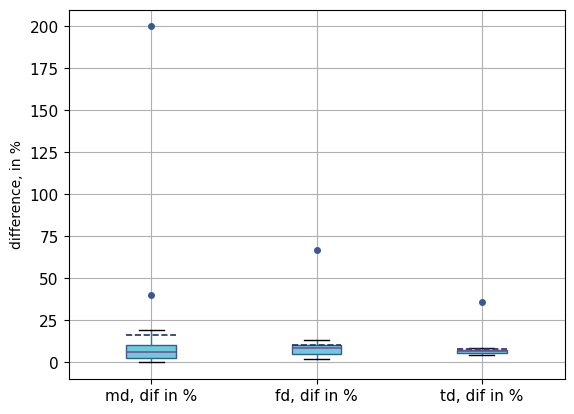

In [33]:
pes_1719.boxplot(
    column=["md, dif in %", "fd, dif in %", "td, dif in %"],
    fontsize=11,
    ylabel="difference, in %",
    meanline=True,
    showmeans=True,
    patch_artist=True,
    medianprops={'color': '#82468c', 'linewidth': 1.1},
    meanprops={'color': "#1e3461", 'linewidth': 1.2},
    boxprops={"facecolor":'#6bccdb', "edgecolor":'#3a5894'},
    flierprops={'marker': 'o', 'markerfacecolor': '#3a5894', 'markersize': 4, 'markeredgecolor': '#3a5894'},
)